## Extract the dataset

In [3]:
pip install ucimlrepo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## Data exploration

In [6]:
data = pd.concat([X, pd.DataFrame(y, columns=['income'])], axis=1)

In [7]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
data.shape

(48842, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Make sure no duplicate entry

In [11]:
data['workclass'] = data['workclass'].str.strip()
data['education'] = data['education'].str.strip()
data['marital-status'] = data['marital-status'].str.strip()
data['occupation'] = data['occupation'].str.strip()
data['relationship'] = data['relationship'].str.strip()
data['race'] = data['race'].str.strip()
data['sex'] = data['sex'].str.strip()
data['native-country'] = data['native-country'].str.strip()
data['income'] = data['income'].str.replace('.', '')

<ipython-input-11-73b06476fb85>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['income'] = data['income'].str.replace('.', '')


<ipython-input-12-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

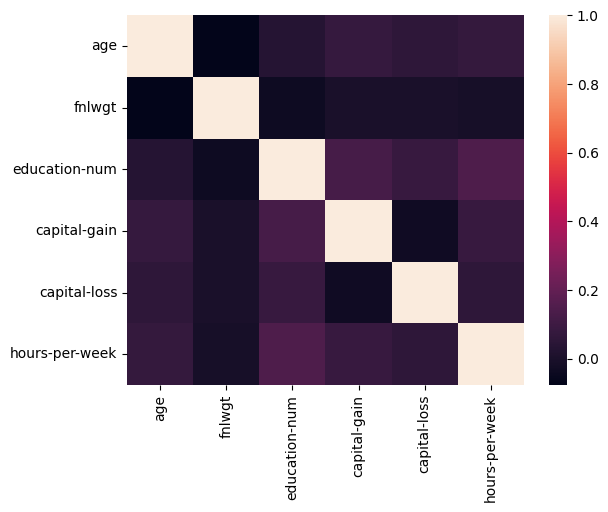

In [12]:
sns.heatmap(data.corr())

##Replace '?' with NaN

In [13]:
data.replace(r'\?', np.NaN, regex=True, inplace=True)

In [14]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


##Fill in with the mode

In [15]:
data.fillna(data.mode().iloc[0], inplace=True)

In [16]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Drop unwanted columns

In [17]:
data.drop(['fnlwgt','education-num'],axis=1,inplace=True)

In [18]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Encoding

In [19]:
print(data['workclass'].value_counts())

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [20]:
workclass_mapping = {
    'Private': 1,
    'Self-emp-not-inc': 2,
    'Local-gov': 3,
    'State-gov': 4,
    'Self-emp-inc': 5,
    'Federal-gov': 6,
    'Without-pay': 7,
    'Never-worked': 8
}

In [21]:
data['workclass'] = data['workclass'].map(workclass_mapping)

In [22]:
print(data['education'].value_counts())

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


In [23]:
education_mapping = {
    'HS-grad': 1,
    'Some-college': 2,
    'Bachelors': 3,
    'Masters': 4,
    'Assoc-voc': 5,
    '11th': 6,
    'Assoc-acdm': 7,
    '10th': 8,
    '7th-8th': 9,
    'Prof-school': 10,
    '9th': 11,
    '12th': 12,
    'Doctorate': 13,
    '5th-6th': 14,
    '1st-4th': 15,
    'Preschool': 16
}

In [24]:
data['education'] = data['education'].map(education_mapping)

In [25]:
print(data['marital-status'].value_counts())

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


In [26]:
marital_status_mapping = {
    'Married-civ-spouse': 0,
    'Never-married': 1,
    'Divorced': 2,
    'Widowed': 3,
    'Separated': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
}

In [27]:
data['marital-status'] = data['marital-status'].map(marital_status_mapping)

In [28]:
print(data['occupation'].value_counts())

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


In [29]:
occupation_mapping = {
    'Prof-specialty': 0,
    'Exec-managerial': 1,
    'Craft-repair': 2,
    'Sales': 3,
    'Adm-clerical': 4,
    'Other-service': 5,
    'Machine-op-inspct': 6,
    'Transport-moving': 7,
    'Handlers-cleaners': 8,
    'Tech-support': 9,
    'Farming-fishing': 10,
    'Protective-serv': 11,
    'Priv-house-serv': 12,
    'Armed-Forces': 13
}


In [30]:
data['occupation'] = data['occupation'].map(occupation_mapping)

In [31]:
print(data['relationship'].value_counts())

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64


In [32]:
relationship_mapping={
    'Husband':0,
    'Not-in-family':1,
    'Own-child':2,
    'Unmarried':3,
    'Wife':4,
    'Other-relative':5
    }

In [33]:
data['relationship'] = data['relationship'].map(relationship_mapping)

In [34]:
print(data['race'].value_counts())

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


In [35]:
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
}

In [36]:
data['race'] = data['race'].map(race_mapping)

In [37]:
print(data['native-country'].value_counts())

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [38]:
native_country_mapping = {
    'United-States': 0,
    'Mexico': 1,
    'Philippines': 2,
    'Germany': 3,
    'Canada': 4,
    'Puerto-Rico': 5,
    'El-Salvador': 6,
    'India': 7,
    'Cuba': 8,
    'England': 9,
    'Jamaica': 10,
    'South': 11,
    'China': 12,
    'Italy': 13,
    'Dominican-Republic': 14,
    'Vietnam': 15,
    'Guatemala': 16,
    'Japan': 17,
    'Poland': 18,
    'Columbia': 19,
    'Taiwan': 20,
    'Haiti': 21,
    'Iran': 22,
    'Portugal': 23,
    'Nicaragua': 24,
    'Peru': 25,
    'France': 26,
    'Greece': 27,
    'Ecuador': 28,
    'Ireland': 29,
    'Hong': 30,
    'Cambodia': 31,
    'Trinadad&Tobago': 32,
    'Laos': 33,
    'Thailand': 34,
    'Yugoslavia': 35,
    'Outlying-US(Guam-USVI-etc)': 36,
    'Honduras': 37,
    'Hungary': 38,
    'Scotland': 39,
    'Holand-Netherlands': 40
}

In [39]:
data['native-country'] = data['native-country'].map(native_country_mapping)

In [40]:
print(data['income'].value_counts())

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [41]:
data['income']=data['income'].apply(lambda x:0 if x == '>=50k' else 1)
# >=50k --> 0
# <=50k -->1

In [42]:
print(data['sex'].value_counts())

Male      32650
Female    16192
Name: sex, dtype: int64


In [43]:
data['sex']= data['sex'].apply(lambda x:0 if x == 'Male' else 1)
#Male =1 Female =0

In [44]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,3,1,4,1,0,0,2174,0,40,0,1
1,50,2,3,0,1,0,0,0,0,0,13,0,1
2,38,1,1,2,8,1,0,0,0,0,40,0,1
3,53,1,6,0,8,0,1,0,0,0,40,0,1
4,28,1,3,0,0,4,1,1,0,0,40,8,1


In [45]:
X = data.drop('income', axis=1)
y = data['income']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initialize the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model to the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the performance of the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Naive Bayes Model Accuracy: {accuracy_nb}")
print("\nClassification Report:\n", classification_report_nb)
print("\nConfusion Matrix:\n", confusion_matrix_nb)

Naive Bayes Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9769

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769


Confusion Matrix:
 [[9769]]


In [48]:
# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the performance of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Model Accuracy: {accuracy_rf}")
print("\nClassification Report:\n", classification_report_rf)
print("\nConfusion Matrix:\n", confusion_matrix_rf)


Random Forest Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9769

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769


Confusion Matrix:
 [[9769]]
